In [1]:
from update_historical_data import update_SET100
# update_SET100() # TODO: change GOLD to FPT

ModuleNotFoundError: No module named 'update_historical_data'

In [1]:
ML_HOME

'/opt/workspace/ml_home'

['attachments', 'created_on', 'parent', 'title', 'updated_on', 'version']

In [2]:
import os, networkx, glob
from pathlib import Path, PurePath

In [5]:


p = Path(files[0]) # Use pathlib https://docs.python.org/3/library/pathlib.html#module-pathlib

p # PosixPath('GetStarted.ipynb')
p.stem # 'GetStarted'
p.parents # An immutable sequence providing access to the logical ancestors of the path
p.parent # .
p.anchor # ''
p.root  # ''

''

In [6]:
# 3. pathlib also has glob function

p = Path(EXPERIMENT_HOME)

folders = set({}) # Stores dir paths that are shared
notebooks = {}

for notebook in p.glob('**/*.ipynb'):
    # print(notebook.parent.is_dir())
    parent_folder = notebook.parent
    parent_folder = PurePath(parent_folder) # Convert to PurePath
    folders.add(parent_folder) # Add parent
    notebooks[notebook] = parent_folder

In [7]:
folders

{PurePosixPath('/opt/workspace'),
 PurePosixPath('/opt/workspace/.ipynb_checkpoints'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition/.ipynb_checkpoints'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.1 Setup Environment'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.1 Setup Environment/.ipynb_checkpoints'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.2 Identify sources and collect data'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.3 Check data, basic statistics'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.3 Check data, basic statistics/.ipynb_checkpoints'),
 PurePosixPath('/opt/workspace/2.0 Feature Engineering'),
 PurePosixPath('/opt/workspace/2.0 Feature Engineering/.ipynb_checkpoints'),
 PurePosixPath('/opt/workspace/2.0 Feature Engineering/0-Tutorials'),
 PurePosixPath('/opt/workspace/2.0 Feature Engineering/0-Tutorials/.ipynb_checkpoints'),
 PurePosixPath('/opt/workspac

In [8]:
for k in notebooks.keys():
    print(k.stem) # The notebook file name.

GetStarted
Single-Stock Historical Data
ReturnsAndVolatility_SingleStock_ADVANC
Eikon_DailyTurnoverValue
Stock_byIndustrySector
Report_ResearchData
SET100Data_BuildDataSet
SET100Data_Pilot
SET100Data_AddFeatureSetV4
Eikon_MetaData
SET100Data_BuildDataSetV4
Eikon_ProcessTable2SeriesCSV
SET100Data_v1
SET100Data_BuildDataSetV3_1
PilotData
SET100Data_AddFeatureSet01
SET100_2015-2019
SET100Data_AddFeatureSet02
SET100Data_BuildDataSetV3
Eikon_MarketCap
SET100Data_BuildDataSetV2
Versions
Stock Database
Environment Information
Stock Database-checkpoint
SET100_2015-2019-checkpoint
Eikon_DailyTurnoverValue-checkpoint
SET100Data_AddFeatureSetV4-checkpoint
SET100Data_AddFeatureSet01-checkpoint
SET100Data_BuildDataSetV2-checkpoint
SET100-Data-checkpoint
SET100Data_BuildDataSetV4-checkpoint
SET100Data_BuildDataSet-checkpoint
Eikon_ProcessTable2SeriesCSV-checkpoint
Report_ResearchData-checkpoint
1.2.3 List of indices
1.2.4 Indices historical series
1.2.5 Risk-free rate series
1.2.1 List of stocks
1.2

In [9]:
import networkx as nx
from networkx.readwrite import json_graph

F = nx.Graph()  # stores Folder
D = nx.Graph()  # stores Document

F.add_nodes_from(folders)
# create edge. Parent-child relationship

for k in notebooks.keys():
    print(k.stem) # The notebook file name.
    D.add_node(k.stem)

GetStarted
Single-Stock Historical Data
ReturnsAndVolatility_SingleStock_ADVANC
Eikon_DailyTurnoverValue
Stock_byIndustrySector
Report_ResearchData
SET100Data_BuildDataSet
SET100Data_Pilot
SET100Data_AddFeatureSetV4
Eikon_MetaData
SET100Data_BuildDataSetV4
Eikon_ProcessTable2SeriesCSV
SET100Data_v1
SET100Data_BuildDataSetV3_1
PilotData
SET100Data_AddFeatureSet01
SET100_2015-2019
SET100Data_AddFeatureSet02
SET100Data_BuildDataSetV3
Eikon_MarketCap
SET100Data_BuildDataSetV2
Versions
Stock Database
Environment Information
Stock Database-checkpoint
SET100_2015-2019-checkpoint
Eikon_DailyTurnoverValue-checkpoint
SET100Data_AddFeatureSetV4-checkpoint
SET100Data_AddFeatureSet01-checkpoint
SET100Data_BuildDataSetV2-checkpoint
SET100-Data-checkpoint
SET100Data_BuildDataSetV4-checkpoint
SET100Data_BuildDataSet-checkpoint
Eikon_ProcessTable2SeriesCSV-checkpoint
Report_ResearchData-checkpoint
1.2.3 List of indices
1.2.4 Indices historical series
1.2.5 Risk-free rate series
1.2.1 List of stocks
1.2

In [10]:
F.nodes()

NodeView((PurePosixPath('/opt/workspace/4.0 Time-series Prediction/XGBoost/.ipynb_checkpoints'), PurePosixPath('/opt/workspace/2.1 Returns (Daily,Weekly,Monthly)'), PurePosixPath('/opt/workspace/4.0 Time-series Prediction/.ipynb_checkpoints'), PurePosixPath('/opt/workspace/2.0 Feature Engineering/RegressionLineSlope'), PurePosixPath('/opt/workspace/4.0 Time-series Prediction/XGBoost'), PurePosixPath('/opt/workspace/dataset/BOT'), PurePosixPath('/opt/workspace/2.0 Feature Engineering/TechnicalAnalysis/.ipynb_checkpoints'), PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.3 Check data, basic statistics'), PurePosixPath('/opt/workspace/2.0 Feature Engineering/0-Tutorials/.ipynb_checkpoints'), PurePosixPath('/opt/workspace/tests/.ipynb_checkpoints'), PurePosixPath('/opt/workspace/2.0 Feature Engineering/VariableImportance'), PurePosixPath('/opt/workspace/2.0 Feature Engineering/KMeans/.ipynb_checkpoints'), PurePosixPath('/opt/workspace/4.0 Time-series Prediction/LSTM/.ipynb_checkpoints

In [147]:
# to create edge between parent and child folder, enumerate tuple (F[folder], F[folder.parent], color='red')
edges = []
for folder in folders:
    try:
        e = (folder, folder.parent) # Use object for node
        edges.append(e)
    except KeyError:
        print("No parent for %s" % folder)
F.add_edges_from(edges, color='red')

In [148]:
list(F.nodes.keys())[0] # or .stem or .as_uri()

PurePosixPath('/opt/workspace/4.0 Time-series Prediction/XGBoost/.ipynb_checkpoints')

In [26]:


# serialize F node object 
# so add a name to each node
# this is one after node_link_data has been created.
    
# write json formatted data
d = json_graph.node_link_data(F)  # node-link format need serializable graph node.

d

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': PurePosixPath('/opt/workspace/4.0 Time-series Prediction/XGBoost/.ipynb_checkpoints')},
  {'id': PurePosixPath('/opt/workspace/2.1 Returns (Daily,Weekly,Monthly)')},
  {'id': PurePosixPath('/opt/workspace/4.0 Time-series Prediction/.ipynb_checkpoints')},
  {'id': PurePosixPath('/opt/workspace/2.0 Feature Engineering/RegressionLineSlope')},
  {'id': PurePosixPath('/opt/workspace/4.0 Time-series Prediction/XGBoost')},
  {'id': PurePosixPath('/opt/workspace/dataset/BOT')},
  {'id': PurePosixPath('/opt/workspace/2.0 Feature Engineering/TechnicalAnalysis/.ipynb_checkpoints')},
  {'id': PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.3 Check data, basic statistics')},
  {'id': PurePosixPath('/opt/workspace/2.0 Feature Engineering/0-Tutorials/.ipynb_checkpoints')},
  {'id': PurePosixPath('/opt/workspace/tests/.ipynb_checkpoints')},
  {'id': PurePosixPath('/opt/workspace/2.0 Feature Engineering/VariableImportance')}

In [33]:
for n in d['nodes']:
    n['id'] = str(n['id']) # serialize manually
for n in d['links']:
    n['source'] = str(n['source']) # serialize manually
    n['target'] = str(n['target'])

In [34]:
d

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': '/opt/workspace/4.0 Time-series Prediction/XGBoost/.ipynb_checkpoints'},
  {'id': '/opt/workspace/2.1 Returns (Daily,Weekly,Monthly)'},
  {'id': '/opt/workspace/4.0 Time-series Prediction/.ipynb_checkpoints'},
  {'id': '/opt/workspace/2.0 Feature Engineering/RegressionLineSlope'},
  {'id': '/opt/workspace/4.0 Time-series Prediction/XGBoost'},
  {'id': '/opt/workspace/dataset/BOT'},
  {'id': '/opt/workspace/2.0 Feature Engineering/TechnicalAnalysis/.ipynb_checkpoints'},
  {'id': '/opt/workspace/1.0 Data Acquisition/1.3 Check data, basic statistics'},
  {'id': '/opt/workspace/2.0 Feature Engineering/0-Tutorials/.ipynb_checkpoints'},
  {'id': '/opt/workspace/tests/.ipynb_checkpoints'},
  {'id': '/opt/workspace/2.0 Feature Engineering/VariableImportance'},
  {'id': '/opt/workspace/2.0 Feature Engineering/KMeans/.ipynb_checkpoints'},
  {'id': '/opt/workspace/4.0 Time-series Prediction/LSTM/.ipynb_checkpoints'},
  {'id

In [35]:
import json
json.dump(d, open("folders.json", "w"))


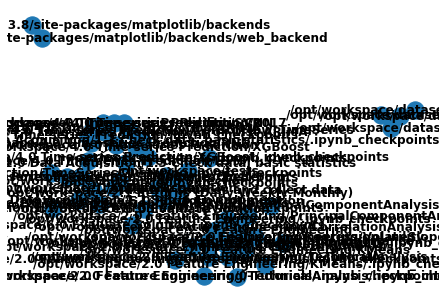

In [36]:
nx.draw(F, with_labels=True, font_weight='bold')

In [59]:
# Compare two paths

F.nodes()[0], F.nodes()[1]

(PurePosixPath('/opt/workspace/2.0 Feature Engineering/Volatility'),
 PurePosixPath('/opt/workspace/1.0 Data Acquisition/1.1 Setup Environment'))

In [65]:
p = F.nodes()[0]


'file:///opt/workspace/2.0%20Feature%20Engineering/Volatility'

In [68]:
p1 = F.nodes()[0]
p2 = F.nodes()[1]

Path(p1).resolve().parent.samefile(Path(p2).resolve().parent)

False

In [131]:
# W = nx.Graph()
P = nx.Graph()

DP = nx.DiGraph() # directed graph version of project information
# Use digraph (directed graph) to model the wiki instead of undirected graph also
# https://networkx.org/documentation/stable/tutorial.html#directed-graphs

# DP.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
dedges = []

nodes = list(w.keys())
edges = []
root = coned.name
nodes.append(root)

for k, p in w.items():
    if hasattr(p, 'parent'): # Edge between child and parent
        e = (p.title, p.parent.title) 
        # build directed graph: parent -> child
        de = (p.parent.title, p.title, 1.0)
    else: # Edge parent-less pages and the project
        e = (p.title, root)
        # build directed graph: project -> wiki pages
        de = (root, p.title, 0.5)
    edges.append(e)
    dedges.append(de) # add edge 

P.add_nodes_from(nodes)
P.add_edges_from(edges, color="red")
DP.add_weighted_edges_from(dedges) # build directed graph from edge with weight list.